##Частина перша: Знайомство з Pandas.

In [ ]:
!pip install lxml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Прочитайте дані за допомогою методу read_html з таблиці "Коефіцієнт народжуваності в регіонах України (1950—2019):

In [2]:
url="https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8#%D0%9D%D0%B0%D1%80%D0%BE%D0%B4%D0%B6%D1%83%D0%B2%D0%B0%D0%BD%D1%96%D1%81%D1%82%D1%8C"
data = pd.read_html(url, match="Коефіцієнт народжуваності в регіонах України", thousands=".", decimal="," )[0]
data.head()

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,23.0,20.6,16.0,13.0,7.3,12.6,—,—
1,Вінницька,22.4,19.2,14.2,12.4,8.4,11.2,10.9,7.6
2,Волинська,24.7,25.0,17.9,15.3,11.2,14.8,14.1,10.1
3,Дніпропетровська,20.4,20.4,15.1,12.3,7.1,11.2,11.1,7.1
4,Донецька,27.1,21.4,14.0,10.9,6.1,9.8,8.2,—


Визначте кількість рядків та стовпців у датафреймі (атрибут shape):

In [ ]:
data.shape

(28, 9)

Замініть у таблиці значення "—" на значення NaN:

In [ ]:
data.replace("—", np.NaN, inplace=True)
data.head()

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,23.0,20.6,16.0,13.0,7.3,12.6,NaN,NaN
1,Вінницька,22.4,19.2,14.2,12.4,8.4,11.2,10.9,7.6
2,Волинська,24.7,25.0,17.9,15.3,11.2,14.8,14.1,10.1
3,Дніпропетровська,20.4,20.4,15.1,12.3,7.1,11.2,11.1,7.1
4,Донецька,27.1,21.4,14.0,10.9,6.1,9.8,8.2,NaN


Визначте типи всіх стовпців за допомогою dataframe.dtypes:

In [ ]:
data.dtypes

Регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014       object
2019       object
dtype: object

Замініть типи нечислових колонок на числові. Підказка - це колонки, де знаходився символ "—":

In [ ]:
data[data.columns[-2:]] = data[data.columns[-2:]].astype(float)
data.dtypes

Регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014      float64
2019      float64
dtype: object

Порахуйте, яка частка пропусків міститься в кожній колонці (використовуйте методи isnull та sum):

In [ ]:
data.isnull().sum()

Регіон    0
1950      2
1960      1
1970      1
1990      0
2000      0
2012      0
2014      2
2019      4
dtype: int64

Видаліть з таблиці дані по всій країні, останній рядок таблиці:

In [ ]:
data.shape

(28, 9)

In [ ]:
data.drop(data.index[-1], inplace=True)
data

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,23.0,20.6,16.0,13.0,7.3,12.6,NaN,NaN
1,Вінницька,22.4,19.2,14.2,12.4,8.4,11.2,10.9,7.6
2,Волинська,24.7,25.0,17.9,15.3,11.2,14.8,14.1,10.1
3,Дніпропетровська,20.4,20.4,15.1,12.3,7.1,11.2,11.1,7.1
4,Донецька,27.1,21.4,14.0,10.9,6.1,9.8,8.2,NaN
5,Житомирська,26.1,22.3,15.9,12.9,8.9,12.2,12.0,7.9
6,Закарпатська,31.4,27.3,20.7,16.8,11.5,15.1,14.6,10.4
7,Запорізька,21.9,19.7,15.0,12.4,7.1,10.6,10.6,6.8
8,Івано-Франківська,24.3,24.8,18.2,15.5,10.3,12.4,12.2,8.8
9,Київська,20.4,18.9,15.6,12.3,7.3,12.2,12.1,8.0


In [ ]:
data.shape

(27, 9)

Замініть відсутні дані в стовпцях середніми значеннями цих стовпців (метод fillna):

In [ ]:
for i in data.columns[data.isnull().any(axis=0)]:
  data[i].fillna(data[i].mean(),inplace=True)

data.round(1)

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,23.0,20.6,16.0,13.0,7.3,12.6,11.1,8.0
1,Вінницька,22.4,19.2,14.2,12.4,8.4,11.2,10.9,7.6
2,Волинська,24.7,25.0,17.9,15.3,11.2,14.8,14.1,10.1
3,Дніпропетровська,20.4,20.4,15.1,12.3,7.1,11.2,11.1,7.1
4,Донецька,27.1,21.4,14.0,10.9,6.1,9.8,8.2,8.0
5,Житомирська,26.1,22.3,15.9,12.9,8.9,12.2,12.0,7.9
6,Закарпатська,31.4,27.3,20.7,16.8,11.5,15.1,14.6,10.4
7,Запорізька,21.9,19.7,15.0,12.4,7.1,10.6,10.6,6.8
8,Івано-Франківська,24.3,24.8,18.2,15.5,10.3,12.4,12.2,8.8
9,Київська,20.4,18.9,15.6,12.3,7.3,12.2,12.1,8.0


In [ ]:
data.dtypes

Регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014      float64
2019      float64
dtype: object

Отримайте список регіонів, де рівень народжуваності у 2019 році був вищим за середній по Україні:

In [ ]:
average_birth_rate = data["2019"].mean()
higher_than_average = data[data["2019"] > average_birth_rate]["Регіон"]
print(higher_than_average)

2             Волинська
6          Закарпатська
8     Івано-Франківська
12            Львівська
14              Одеська
16           Рівненська
20           Херсонська
23          Чернівецька
25                 Київ
Name: Регіон, dtype: object


У якому регіоні була найвища народжуваність у 2014 році?

In [ ]:
data[['2014', 'Регіон']].max()

2014              14.8
Регіон    Чернігівська
dtype: object

##***Graphs***:

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

Побудуйте стовпчикову діаграму народжуваності по регіонах у 2019 році:

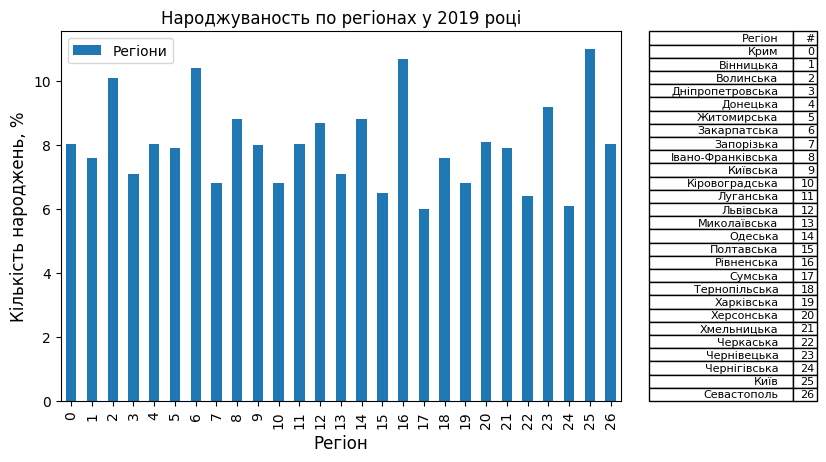

In [ ]:
data[['2019', 'Регіон']].plot(kind='bar')

plt.title("Народжуваность по регіонах у 2019 році", color='black')
plt.legend(['Регіони'], loc='upper left')

plt.xlabel('Регіон', fontsize=12)
plt.ylabel('Кількість народжень, %', fontsize=12)

regions = data['Регіон'].tolist()
table_data = [[r, str(i)] for i, r in enumerate(regions, 0)]
table_data.insert(0, ['Регіон', '#'])
table = plt.table(cellText=table_data, colWidths=[0.6, 0.1], bbox=[1.05, 0, 0.3, 1], loc='left')

plt.subplots_adjust(right=1) #size
plt.xticks(rotation=90)
plt.show()

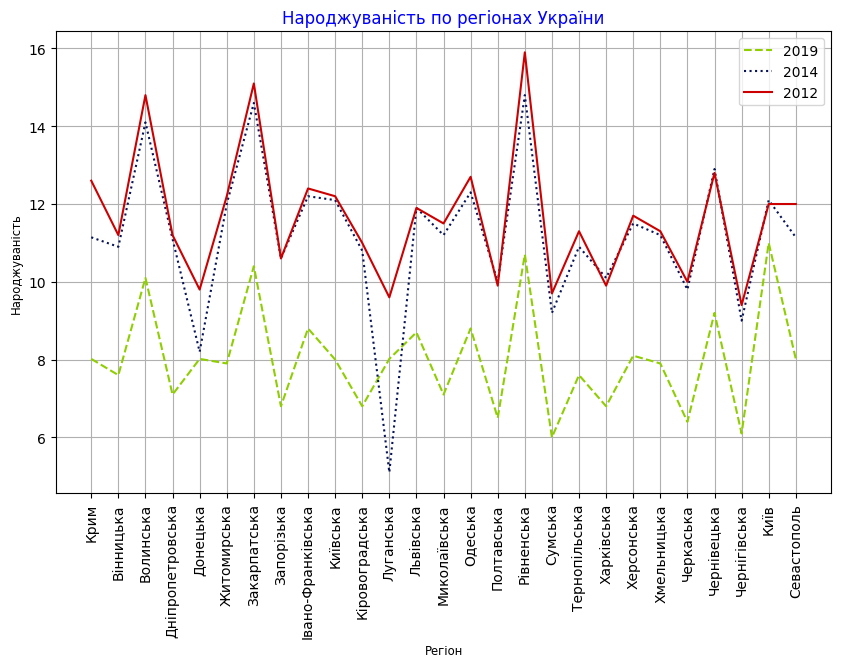

In [ ]:
data.drop_duplicates(subset='Регіон', keep='first', inplace=True)

fig, axs = plt.subplots(figsize=(10,6))
axs.plot(data['Регіон'], data['2019'], label='2019', linestyle="--", color="#8fce00")
axs.plot(data['Регіон'], data['2014'], label='2014', linestyle=":", color="#061358")
plt.plot(data['Регіон'], data['2012'], label='2012', color="#cc0000")

plt.xlabel('Регіон', fontsize='small')
plt.ylabel('Народжуваність', fontsize='small')
plt.title('Народжуваність по регіонах України', color="blue")
plt.xticks(rotation=90)
plt.grid()
plt.legend()
plt.show()

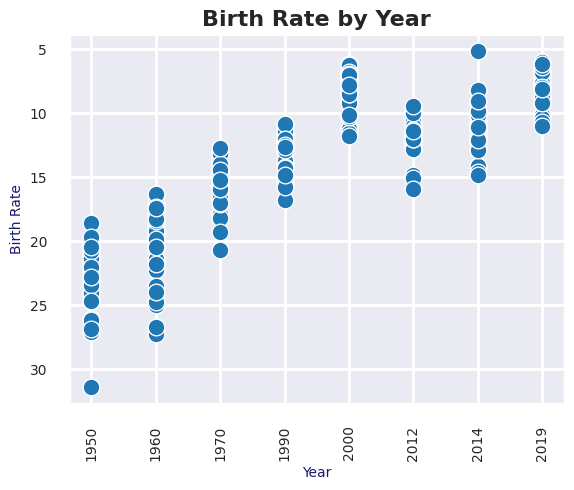

In [30]:
import seaborn as sns

data.replace('—', np.nan, inplace=True)

years = ['1950', '1960', '1970', '1990', '2000', '2012', '2014', '2019']
melted_data = pd.melt(data, id_vars=['Регіон'], var_name='Рік', value_name='Народжуваність')

sns.set_style('darkgrid')
sns.set_context("poster", rc={"figure.figsize": (12, 8), "axes.labelsize": 10, "xtick.labelsize": 10, "ytick.labelsize": 10})

sns.scatterplot(x='Рік', y='Народжуваність', data=melted_data)

plt.xticks(rotation=90)
plt.title('Birth Rate by Year', fontweight="bold", fontsize=16)
plt.xlabel('Year', color="midnightblue")
plt.ylabel('Birth Rate', color="midnightblue")

plt.show()